# Titanic Challenge

https://www.kaggle.com/c/titanic/overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# Check out the varaibles for the loaded data
train.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
# Check out the varaibles for the loaded data
test.head(5)
# Contains everything except the target which is what we're trying to predict 'Survived'

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [5]:
# This seems to be a classification problem
# on the survived column, 1 = Yes and 0 = No

## Understanding the Variables

In [6]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### pclass
pclass: A proxy for socio-economic status (SES)
    1st = Upper
    2nd = Middle
    3rd = Lower

### Age
age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

### sibsp
sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

### parch
parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

The model we're going to use is RandomForest.
Random Forest only takes in numeric values so we'll have to do something about it.
For this we can either make them numbers through encoding or just drop them.

# Analysis

To get a better understanding of the data

In [7]:
train.profile_report()

# Survived Data Summary/Analysis

In [8]:
survived_train = train.copy()

In [9]:
survived_train = survived_train[survived_train.Survived == 1]

In [10]:
survived_train.profile_report()

### More Analysis

In [11]:
women = train.loc[train.Sex == 'female']["Survived"]
prop_women = sum(women) / len(women)
print("% of women who survived Titanic Crash:", prop_women)

% of women who survived Titanic Crash: 0.7420382165605095


In [12]:
men = train.loc[train.Sex == 'male']["Survived"]
prop_men = sum(men) / len(men)
print("% of men who survived Titanic Crash:", prop_men)

% of men who survived Titanic Crash: 0.18890814558058924


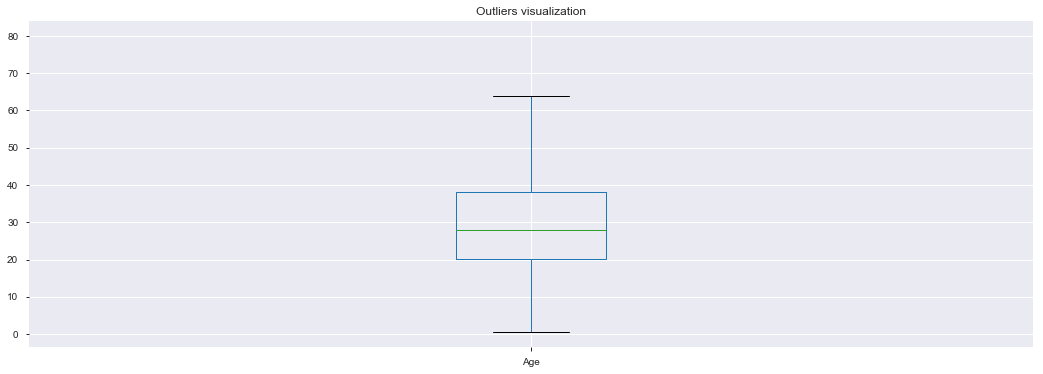

In [13]:
plt.subplots(figsize=(18,6))
plt.title("Outliers visualization")
train.boxplot(column=['Age'])

In [14]:
age_survival = train.groupby(['Age'])['Survived'].agg('sum')

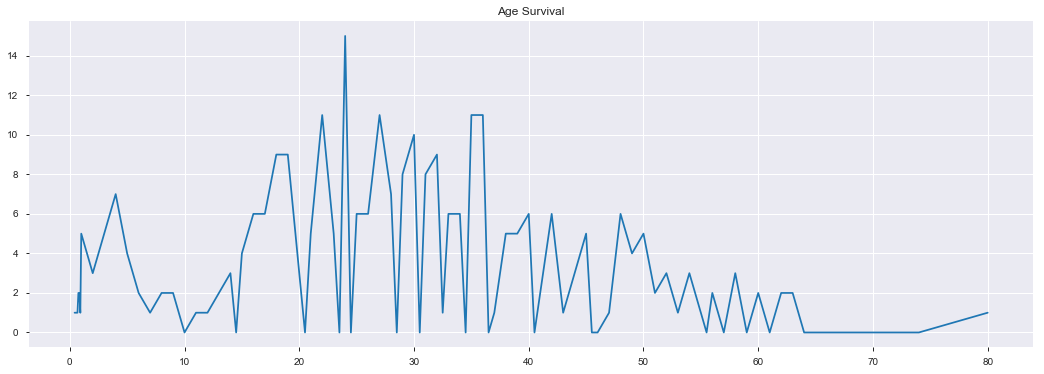

In [15]:
plt.subplots(figsize=(18,6))
plt.title("Age Survival")
plt.plot(age_survival)

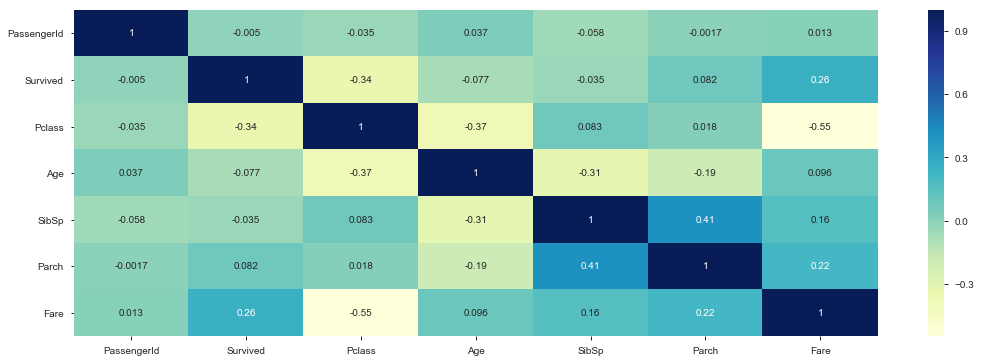

In [16]:
corr = train.corr()
# corr
plt.subplots(figsize=(18,6))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap="YlGnBu", annot=True)

Seems Fare is the most positively corelated with Survival at 0.34 - is this significant enough? - I think not.
Seems Pclass (Ticket class) is the most negatively corelated with Survival at 0.34 - is this significant enough? - I think not.

## Passenger Class Distribution - Survived vs Non-Survived

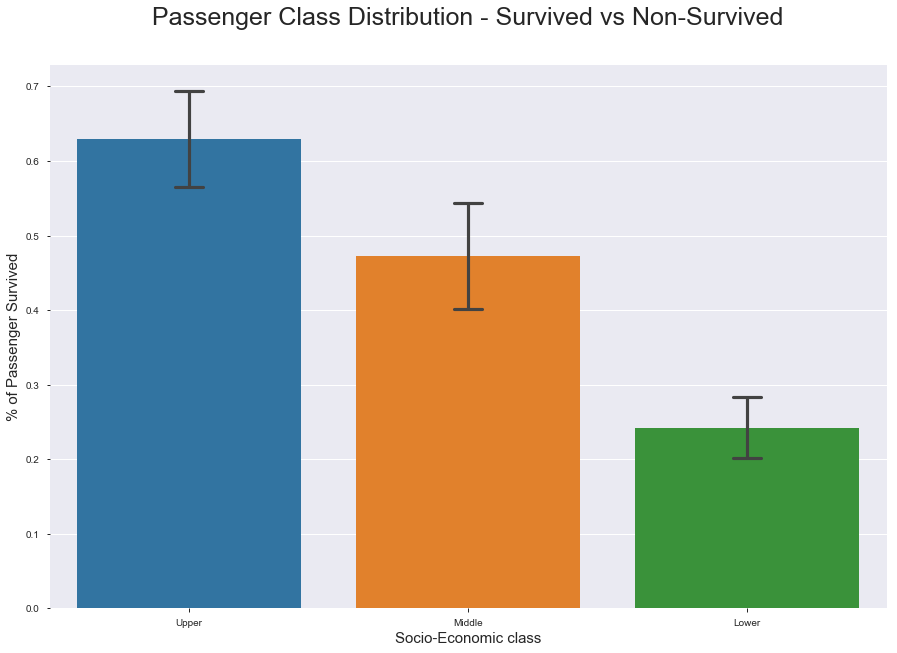

In [17]:
plt.subplots(figsize = (15,10))
sns.barplot(x = "Pclass", 
            y = "Survived", 
            data=train, 
            linewidth=5,
            capsize = .1

           )
plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 25, pad=40)
plt.xlabel("Socio-Economic class", fontsize = 15);
plt.ylabel("% of Passenger Survived", fontsize = 15);
labels = ['Upper', 'Middle', 'Lower']
#val = sorted(train.Pclass.unique())
val = [0,1,2] ## this is just a temporary trick to get the label right. 
plt.xticks(val, labels);

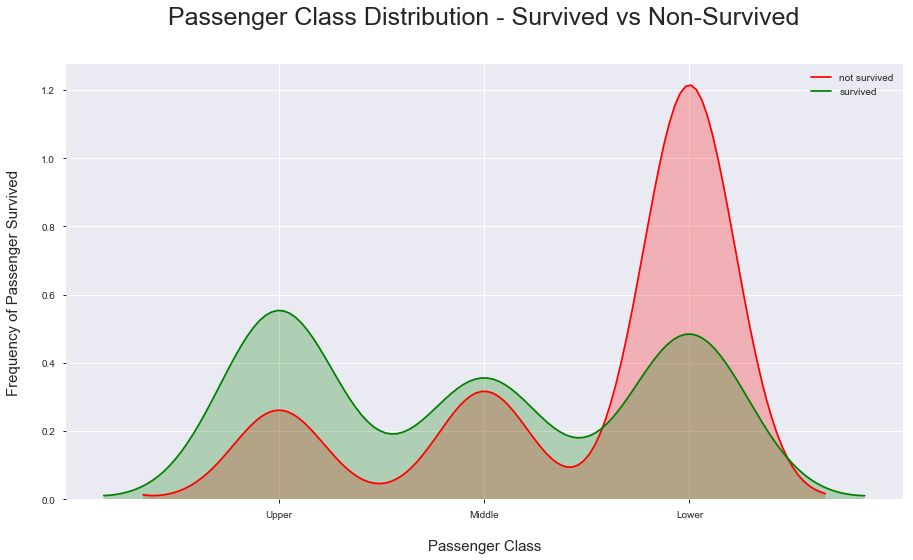

In [18]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
## I have included to different ways to code a plot below, choose the one that suites you. 
ax=sns.kdeplot(train.Pclass[train.Survived == 0] , 
               color='red',
               shade=True,
               label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Pclass'] , 
               color='green',
               shade=True, 
               label='survived', 
              )
plt.title('Passenger Class Distribution - Survived vs Non-Survived', fontsize = 25, pad = 40)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15, labelpad = 20)
plt.xlabel("Passenger Class", fontsize = 15,labelpad =20)
## Converting xticks into words for better understanding
labels = ['Upper', 'Middle', 'Lower']
plt.xticks(sorted(train.Pclass.unique()), labels);



This KDE plot is pretty self-explanatory with all the labels and colors.
The lower class passengers have survived more than second-class passengers by looking at the absolute numbers. It is true since there were a lot more third-class passengers than first and second.

# Deal with Missing Values

### Combine Train and Test

In [19]:
train_test = pd.concat([train, test], ignore_index=False)

In [20]:
# Columns with Missing Values will have >0
train_test.isna().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

### Age

- Use the Median Age for nulls

In [21]:
age_median = round(train_test.Age.median(),0)
age_median

28.0

In [22]:
train_test.Age.fillna(age_median, inplace=True)

In [23]:
train_test.isna().sum()

Age               0
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

### Cabin

Check For the number of null values in the Train and Test.

In [24]:
train_test.isna().sum()

Age               0
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

Seperate Values with Nulls and values without Nulls

Replace blanks with N and Get the First Letter From the Cabin

In [25]:
train_test.Cabin.fillna("N", inplace=True)

In [26]:
train_test.Cabin = [i[0] for i in train_test.Cabin]

Get the mean fares by the cabin. Maybe this will give us an idea of the Cabin Prices to fill in the Null

In [27]:
train_test.groupby("Cabin")['Fare'].mean().sort_values()

Cabin
G     14.205000
F     18.079367
N     19.132707
T     35.500000
A     41.244314
D     53.007339
E     54.564634
C    107.926598
B    122.383078
Name: Fare, dtype: float64

In [28]:
# To Fill in the Blanks in Cabin
def cabin_estimator_by_fare(i):
    a = 0
    if i<16:
        a = "G"
    elif i>=16 and i<27:
        a = "F"
    elif i>=27 and i<38:
        a = "T"
    elif i>=38 and i<47:
        a = "A"
    elif i>= 47 and i<53:
        a = "E"
    elif i>= 53 and i<54:
        a = "D"
    elif i>=54 and i<116:
        a = 'C'
    else:
        a = "B"
    return a

In [29]:
without_Null = train_test[train_test.Cabin !="N"]
with_Null = train_test[train_test.Cabin =="N"]

In [30]:
with_Null['Cabin'] = with_Null.Fare.apply(lambda x: cabin_estimator_by_fare(x))

In [31]:
with_Null.groupby("Cabin")['Fare'].mean().sort_values()

Cabin
G      9.305720
F     22.736161
T     30.824482
A     42.438122
E     49.540840
C     68.994880
B    206.404867
Name: Fare, dtype: float64

Concat with_Null & without_Null

In [32]:
train_test = pd.concat([with_Null, without_Null], axis=0)

In [33]:
train_test.groupby("Cabin")['Fare'].mean().sort_values()

Cabin
G      9.341429
F     22.226824
T     30.887665
A     41.902127
D     53.007339
E     54.018570
C     95.513586
B    135.477383
Name: Fare, dtype: float64

## Embarked

Seems we have 2 nulls on the embarked column

In [34]:
train_test.isna().sum()

Age              0
Cabin            0
Embarked         2
Fare             1
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
dtype: int64

In [35]:
train_test[train_test.Embarked.isnull()]

Age Cabin Embarked  Fare                                       Name  \
61   38.0     B      NaN  80.0                        Icard, Miss. Amelie   
829  62.0     B      NaN  80.0  Stone, Mrs. George Nelson (Martha Evelyn)   

     Parch  PassengerId  Pclass     Sex  SibSp  Survived  Ticket  
61       0           62       1  female      0       1.0  113572  
829      0          830       1  female      0       1.0  113572

Can we use the Fare Price to determine where they Embarked the Titanic?

In [36]:
train_test.groupby("Embarked")['Fare'].mean().sort_values()

Embarked
Q    12.409012
S    27.418824
C    62.336267
Name: Fare, dtype: float64

Seems the higher fares are for passengers who got in at Cherbourg (C),

In [37]:
train_test.groupby(["Pclass"])['Fare'].mean().sort_values()

Pclass
3    13.302889
2    21.179196
1    87.508992
Name: Fare, dtype: float64

Seems Pclass 1 had the highest fares, I wasn't expecting any surprise here.
But for this we can also see that the two passengers missing Embarked were in Pclass 1
Can we use both and see the assumption that we can make

In [38]:
train_test.groupby(["Embarked","Pclass", "Cabin"])['Fare'].mean().sort_values()

Embarked  Pclass  Cabin
S         1       G          0.000000
Q         3       G          8.494627
S         3       G          8.647691
C         3       G          9.793160
S         3       E         11.000000
          2       E         11.333333
Q         2       G         11.632633
S         2       G         11.672545
Q         2       E         12.350000
S         2       D         13.000000
C         2       D         13.893750
                  G         14.175364
          3       F         18.655650
S         3       F         19.637760
Q         3       F         21.421429
S         2       F         23.933140
C         2       F         24.000000
          1       F         26.097233
S         1       F         26.361667
C         1       T         28.468200
Q         3       T         29.125000
S         3       T         31.116500
          2       T         31.250000
          1       T         32.170825
C         2       T         32.370829
          1       A       

From the Above, it in incredibly clear that passengers of Pclass 1 in Cabin B had that had a mean fare of 78.5 embarked in Southampton
I'm going to assume they're both from Southampton

In [39]:
train_test.Embarked.fillna("C", inplace=True)

In [40]:
train_test.isna().sum()

Age              0
Cabin            0
Embarked         0
Fare             1
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
dtype: int64

## Fare

We only have 1 null Value here, let's see it

In [41]:
train_test[train_test.Fare.isnull()]

Age Cabin Embarked  Fare                Name  Parch  PassengerId  \
152  60.5     B        S   NaN  Storey, Mr. Thomas      0         1044   

     Pclass   Sex  SibSp  Survived Ticket  
152       3  male      0       NaN   3701

Here. I'm going to use the mean of the Cabin, Pclass that this passenger is in to estimate the fare

In [42]:
train_test.groupby(["Embarked","Pclass", "Cabin"])['Fare'].mean().sort_values()

Embarked  Pclass  Cabin
S         1       G          0.000000
Q         3       G          8.494627
S         3       G          8.647691
C         3       G          9.793160
S         3       E         11.000000
          2       E         11.333333
Q         2       G         11.632633
S         2       G         11.672545
Q         2       E         12.350000
S         2       D         13.000000
C         2       D         13.893750
                  G         14.175364
          3       F         18.655650
S         3       F         19.637760
Q         3       F         21.421429
S         2       F         23.933140
C         2       F         24.000000
          1       F         26.097233
S         1       F         26.361667
C         1       T         28.468200
Q         3       T         29.125000
S         3       T         31.116500
          2       T         31.250000
          1       T         32.170825
C         2       T         32.370829
          1       A       

seems there was no one else who embarked at Southampton, had a ticket class of 3 in Cabin B..

Hmm.. interesting, I'm going to ignore the Pclass and use the mean of the Embarked NS 

In [43]:
Embarked_S = train_test[train_test.Embarked =="S"]
Embarked_S_Cabin_B = Embarked_S[Embarked_S.Cabin =="B"]

In [44]:
missing_Fare = Embarked_S_Cabin_B.Fare.mean()

In [45]:
train_test.Fare.fillna(missing_Fare, inplace=True)

In [46]:
train_test.isna().sum()

Age              0
Cabin            0
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
dtype: int64

Let's split back to train and test

The PassengerId wil help us here..

In [47]:
train = train_test[train_test.PassengerId <=891]

In [48]:
test = train_test[train_test.PassengerId >891]

In [49]:
train.isna().sum()

Age            0
Cabin          0
Embarked       0
Fare           0
Name           0
Parch          0
PassengerId    0
Pclass         0
Sex            0
SibSp          0
Survived       0
Ticket         0
dtype: int64

## Change Categorical Variables to Numerics (Manual) + Drop Columns

In [50]:
train.dtypes

Age            float64
Cabin           object
Embarked        object
Fare           float64
Name            object
Parch            int64
PassengerId      int64
Pclass           int64
Sex             object
SibSp            int64
Survived       float64
Ticket          object
dtype: object

In [51]:
test.dtypes

Age            float64
Cabin           object
Embarked        object
Fare           float64
Name            object
Parch            int64
PassengerId      int64
Pclass           int64
Sex             object
SibSp            int64
Survived       float64
Ticket          object
dtype: object

In [52]:
# copy the data to a different df
train2 = train.copy()
test2 = test.copy()

In [53]:
#If male = 1, female = 0
train2.Sex.replace(['male', 'female'], [1, 0], inplace=True)
test2.Sex.replace(['male', 'female'], [1, 0], inplace=True)

In [54]:
# C = Cherbourg = 0 , Q = Queenstown = 1, S = Southampton = 2
train2.Embarked.replace(['C', 'S', 'Q'], [0, 1, 2], inplace=True)
test2.Embarked.replace(['C', 'S', 'Q'], [0, 1, 2], inplace=True)

In [55]:
# Change fare type to numeric
train2.Fare = train2.Fare.astype('float64')
test2.Fare = test2.Fare.astype('float64')

### Cabin

In [56]:
train2.Cabin.unique()

array(['G', 'F', 'T', 'C', 'E', 'A', 'B', 'D'], dtype=object)

In [57]:
test2.Cabin.unique()

array(['G', 'T', 'F', 'C', 'A', 'B', 'E', 'D'], dtype=object)

In [58]:
train2.Cabin.replace(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'], [0, 1, 2, 3, 4, 5, 6, 7], inplace=True)
test2.Cabin.replace(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'], [0, 1, 2, 3, 4, 5, 6, 7], inplace=True)

In [59]:
train2.head()

Age  Cabin  Embarked     Fare                            Name  Parch  \
0  22.0      6         1   7.2500         Braund, Mr. Owen Harris      0   
2  26.0      6         1   7.9250          Heikkinen, Miss. Laina      0   
4  35.0      6         1   8.0500        Allen, Mr. William Henry      0   
5  28.0      6         2   8.4583                Moran, Mr. James      0   
7   2.0      5         1  21.0750  Palsson, Master. Gosta Leonard      1   

   PassengerId  Pclass  Sex  SibSp  Survived            Ticket  
0            1       3    1      1       0.0         A/5 21171  
2            3       3    0      0       1.0  STON/O2. 3101282  
4            5       3    1      0       0.0            373450  
5            6       3    1      0       0.0            330877  
7            8       3    1      3       0.0            349909

In [60]:
test2.head()

Age  Cabin  Embarked     Fare  \
0  34.5      6         2   7.8292   
1  47.0      6         1   7.0000   
2  62.0      6         2   9.6875   
3  27.0      6         1   8.6625   
4  22.0      6         1  12.2875   

                                           Name  Parch  PassengerId  Pclass  \
0                              Kelly, Mr. James      0          892       3   
1              Wilkes, Mrs. James (Ellen Needs)      0          893       3   
2                     Myles, Mr. Thomas Francis      0          894       2   
3                              Wirz, Mr. Albert      0          895       3   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)      1          896       3   

   Sex  SibSp  Survived   Ticket  
0    1      0       NaN   330911  
1    0      1       NaN   363272  
2    1      0       NaN   240276  
3    1      0       NaN   315154  
4    0      1       NaN  3101298

In [61]:
train2.dtypes

Age            float64
Cabin            int64
Embarked         int64
Fare           float64
Name            object
Parch            int64
PassengerId      int64
Pclass           int64
Sex              int64
SibSp            int64
Survived       float64
Ticket          object
dtype: object

In [62]:
test2.dtypes

Age            float64
Cabin            int64
Embarked         int64
Fare           float64
Name            object
Parch            int64
PassengerId      int64
Pclass           int64
Sex              int64
SibSp            int64
Survived       float64
Ticket          object
dtype: object

I will drop Name and Ticket for this one

In [63]:
train2= train2._get_numeric_data()
test2= test2._get_numeric_data()

I'll also drop PassengerId

In [64]:
test_with_pass_id = test2.copy()
train_with_pass_id = train2.copy()

train2 = train2.drop(["PassengerId"], axis = 1)
test2 = test2.drop(["PassengerId"], axis = 1)

In [65]:
train2.head()

Age  Cabin  Embarked     Fare  Parch  Pclass  Sex  SibSp  Survived
0  22.0      6         1   7.2500      0       3    1      1       0.0
2  26.0      6         1   7.9250      0       3    0      0       1.0
4  35.0      6         1   8.0500      0       3    1      0       0.0
5  28.0      6         2   8.4583      0       3    1      0       0.0
7   2.0      5         1  21.0750      1       3    1      3       0.0

In [66]:
test2.head(5)

Age  Cabin  Embarked     Fare  Parch  Pclass  Sex  SibSp  Survived
0  34.5      6         2   7.8292      0       3    1      0       NaN
1  47.0      6         1   7.0000      0       3    0      1       NaN
2  62.0      6         2   9.6875      0       2    1      0       NaN
3  27.0      6         1   8.6625      0       3    1      0       NaN
4  22.0      6         1  12.2875      1       3    0      1       NaN

# Split into Train and Test

In [67]:
#Split the data frame into two sets: features and target
y = train2["Survived"]
train2.drop(["Survived"], axis=1, inplace=True)
X = train2

# X.shape, y.shape

In [68]:
#Split the labeled data frame into two sets to train then test the models
X_train, X_test, y_train, y_test = train_test_split(train2, y, test_size=0.25, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((668, 8), (668,), (223, 8), (223,))

In [69]:
# X_train.head(5)
X_train.dtypes

Age         float64
Cabin         int64
Embarked      int64
Fare        float64
Parch         int64
Pclass        int64
Sex           int64
SibSp         int64
dtype: object

## Models

### Random Forest Classifier

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rf = RandomForestClassifier(bootstrap=True, 
                        class_weight=None, 
                        criterion='gini',
                        max_depth=None, 
                        max_features='auto',
                        max_leaf_nodes=None,
                        min_impurity_split=0.0,
                        min_samples_leaf=1,
                        min_samples_split=2,
                        min_weight_fraction_leaf=0.0,
                        n_estimators=10, 
                        n_jobs=1, 
                        oob_score=False, 
                        random_state=None,
                        verbose=0, 
                        warm_start=False,)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
# print(y_pred)

In [72]:
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 78.48%


### XGBoost

In [73]:
from xgboost import XGBClassifier

In [74]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [75]:
xgb = XGBClassifier(base_score=0.5,
                    booster='gbtree',
                    colsample_bylevel=1,
                    colsample_bynode=1,
                    colsample_bytree=1,
                    gamma=0,
                    learning_rate=0.1, 
                    max_delta_step=0, 
                    max_depth=3,
                    min_child_weight=1, 
                    missing=None, 
                    n_estimators=100, 
                    n_jobs=1,
                    nthread=None, 
                    objective='binary:logistic', 
                    random_state=0,
                    reg_alpha=0,
                    reg_lambda=1,
                    scale_pos_weight=1,
                    seed=None,
                    silent=None,
                    subsample=1,
                    verbosity=1)

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

In [76]:
# make predictions for test data
y_pred = xgb.predict(X_test)
# predictions = [round(value) for value in y_pred]


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 82.96%


## Hyperparameters tuning for XGBoost using RandomizedSearchCV

In [77]:
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint

est = XGBClassifier(n_jobs=-1)

XGB_p_dist = {
#                     'base_score':(0,1),
                    'booster':['gbtree','gblinear'],
                    'colsample_bylevel':[0.5,1],
                    'colsample_bynode':[0.5,1],
                    'colsample_bytree':[0.5,1],
#                     'learning_rate':0.1, 
#                     'max_delta_step':0, 
                    'gamma':[i/10.0 for i in range(0,5)],
                    'max_depth':range(3,10,2),
                    'min_child_weight':range(1,6,2), 
#                     'missing':None, 
                    'n_estimators':range(1,100,2), 
#                     'n_jobs':1,
#                     'nthread':None, 
#                     'objective':'binary:logistic', 
#                     'random_state':0,
#                     'reg_alpha':0,
#                     'reg_lambda':1,
#                     'scale_pos_weight':1,
                    'seed':range(0,100,2),
                    'silent':[0,1],
                    'subsample':[0.5,1],
#                     'verbosity':1
            }






def hypertuning_rscv(est, p_distr, nbr_iter,X,y): #regressor, parameters given, iterations & complete dataset
    rdmsearch = RandomizedSearchCV(
                                   est, # Regressor
                                   param_distributions=p_distr, # parameters
                                   n_jobs=-1, # all cores to be used for computation
                                   n_iter=nbr_iter, # iterations
                                   cv=9  # number of cross validations
                                  )
    #CV = Cross-Validation ( here using Stratified KFold CV)
    rdmsearch.fit(X,y)
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    return ht_params, ht_score

XGB_parameters, XGB_ht_score = hypertuning_rscv(est, XGB_p_dist, 40, X, y)

In [78]:
XGB_parameters

{'subsample': 1,
 'silent': 0,
 'seed': 10,
 'n_estimators': 95,
 'min_child_weight': 1,
 'max_depth': 7,
 'gamma': 0.2,
 'colsample_bytree': 1,
 'colsample_bynode': 0.5,
 'colsample_bylevel': 1,
 'booster': 'gbtree'}

In [79]:
xgb_tuned = XGBClassifier(
                    subsample=XGB_parameters["subsample"],
                    silent=XGB_parameters["silent"],
                    n_estimators=XGB_parameters["n_estimators"],
                    min_child_weight=XGB_parameters["min_child_weight"], 
                    max_depth=XGB_parameters["max_depth"],
                    gamma=XGB_parameters["gamma"],
                    colsample_bytree=XGB_parameters["colsample_bytree"], 
                    colsample_bynode=XGB_parameters["colsample_bynode"],
                    colsample_bylevel=XGB_parameters["colsample_bylevel"],
                    booster=XGB_parameters["booster"]
                    )

xgb_tuned.fit(X_train, y_train)
# make predictions for test data
y_pred_xgbtuned = xgb_tuned.predict(X_test)
# predictions = [round(value) for value in y_pred]


accuracy = accuracy_score(y_test, y_pred_xgbtuned)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 82.06%


### sklearn Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear',
                            penalty= 'l1',   
                            )

logreg.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
y_pred_sk_learn = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_sk_learn)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.13%


### Decision Tree Classifier

In [82]:
from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV, StratifiedKFold


decision_tree = DecisionTreeClassifier(max_features = 7, max_depth=3)

decision_tree.fit(X_train, y_train)

y_pred_DTC = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_DTC)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 82.06%


#### Tuning the DTC

In [83]:
def hypertuning_rscv_DTC(est, p_distr, nbr_iter,X,y): #regressor, parameters given, iterations & complete dataset
    rdmsearch = RandomizedSearchCV(
                                   est, # Regressor
                                   param_distributions=p_distr, # parameters
                                   n_jobs=-1, # all cores to be used for computation
                                   n_iter=nbr_iter, # iterations
                                   cv=10  # number of cross validations
                                  )
    #CV = Cross-Validation ( here using Stratified KFold CV)
    rdmsearch.fit(X,y)
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    return ht_params, ht_score

In [84]:
dt = DecisionTreeClassifier()

max_depth = range(1,30)
max_feature = [21,22,23,24,25,26,28,29,30,'auto']
criterion=["entropy", "gini"]

DTC_p_dist = {'max_depth':range(1,40,2), 
         'max_features':[1,2,3,4,5,6,7,8],
         'criterion': ['entropy','gini']}

DTC_p_dist, DCT_ht_score = hypertuning_rscv_DTC(dt, DTC_p_dist, 60, X, y)

print(DTC_p_dist)

decision_tree_tuned = DecisionTreeClassifier(criterion = DTC_p_dist["criterion"], 
                                       max_depth = DTC_p_dist["max_depth"], 
                                       max_features = DTC_p_dist["max_features"])

decision_tree_tuned.fit(X_train, y_train)

y_pred_DTC = decision_tree_tuned.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_DTC)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


{'max_features': 4, 'max_depth': 7, 'criterion': 'entropy'}
Accuracy: 81.17%


### Bagging

In [86]:
from sklearn.ensemble import BaggingClassifier

In [87]:
Bagging = BaggingClassifier()

Bagging.fit(X_train, y_train)

y_pred_Bag = Bagging.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_Bag)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 75.34%


In [88]:
def hypertuning_rscv_Bag(est, p_distr, nbr_iter,X,y): #regressor, parameters given, iterations & complete dataset
    rdmsearch = RandomizedSearchCV(
                                   est, # Regressor
                                   param_distributions=p_distr, # parameters
                                   n_jobs=-1, # all cores to be used for computation
                                   n_iter=nbr_iter, # iterations
                                   cv=10  # number of cross validations
                                  )
    #CV = Cross-Validation ( here using Stratified KFold CV)
    rdmsearch.fit(X,y)
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    return ht_params, ht_score

In [89]:
Bagging = BaggingClassifier()

Bag_p_dist = {"n_estimators" : [10,30,50,70,80,150,160, 170,175,180,185]}

Bag_p_dist, Bag_ht_score = hypertuning_rscv_Bag(Bagging, Bag_p_dist, 60, X, y)

print(Bag_p_dist)

Bagging_tuned = BaggingClassifier(n_estimators = Bag_p_dist["n_estimators"])

Bagging_tuned.fit(X_train, y_train)

y_pred_Bag = Bagging_tuned.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_Bag)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


{'n_estimators': 180}
Accuracy: 80.27%


### Gradient Boosting Classifier

In [90]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boost = GradientBoostingClassifier()
gradient_boost.fit(X, y)
y_pred = gradient_boost.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 91.03%


### ExtraTreesClassifier

In [91]:
from sklearn.ensemble import ExtraTreesClassifier
ExtraTreesClassifier = ExtraTreesClassifier()
ExtraTreesClassifier.fit(X, y)
ExtraTreesClassifier_y_pred = ExtraTreesClassifier.predict(X_test)
accuracy = accuracy_score(y_test, ExtraTreesClassifier_y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.21%


# Feature Scaling

In [92]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

## transforming "X_train"
X_train_scaled = sc.fit_transform(X_train)
## transforming "X_test"
X_test_scaled = sc.transform(X_test)

## transforming "The test_set"
test2_n = test2.drop(["Survived"], axis = 1)
test_scaled = sc.transform(test2_n)

### logreg_scaled

In [93]:
logreg_scaled = LogisticRegression(solver='liblinear',
                            penalty= 'l1',   
                            )

logreg_scaled.fit(X_train_scaled,y_train)
y_pred_sk_learn = logreg_scaled.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_sk_learn)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 76.68%


### decision_tree_scaled

In [94]:
decision_tree_scaled = DecisionTreeClassifier(max_features = 6, 
                                       max_depth=7, 
                                       criterion= 'entropy')

decision_tree_scaled.fit(X_train_scaled, y_train)
y_pred_DTC = decision_tree_scaled.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_DTC)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 79.82%


### Bagging_scaled

In [95]:
Bagging_scaled = BaggingClassifier(n_estimators = 170)

Bagging_scaled.fit(X_train_scaled, y_train)

y_pred_Bag_scaled = Bagging_scaled.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_Bag_scaled)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.27%


## Submission

In [96]:
test2.Age = test2.Age.astype('float32')
test2.Fare = test2.Fare.astype('float32')

### Submission Predictions

In [97]:
ExtraTreesClassifier_Submission = ExtraTreesClassifier.predict(test2.iloc[:,0:8])

Bag_Submission = Bagging_tuned.predict(test2.iloc[:,0:8])
Bagging_scaled_submission = Bagging_scaled.predict(test2.iloc[:,0:8])


decision_tree_submission = decision_tree.predict(test2.iloc[:,0:8])
decision_tree_scaled_Submission = decision_tree_scaled.predict(test2.iloc[:,0:8])

logreg_scaled_submission = logreg_scaled.predict(test2.iloc[:,0:8])

gradient_boost_submission = gradient_boost.predict(test2.iloc[:,0:8])

xgb_submission = xgb.predict(test2.iloc[:,0:8])
xgb_tuned_submission = xgb_tuned.predict(test2.iloc[:,0:8])

rf_submission = rf.predict(test2.iloc[:,0:8])

In [98]:
# y_pred_Bag_scaled

In [99]:
pred_submission = rf_submission
pred_submission_name = "rf_submission"

In [100]:
submission = pd.DataFrame({
        "PassengerId": test_with_pass_id.PassengerId,
        "Survived": pred_submission
    })

In [101]:
# submission.head(2)

In [102]:
submission.PassengerId = submission.PassengerId.astype(int)
submission.Survived = submission.Survived.astype(int)

In [103]:
fullpath = str(pred_submission_name) + ".csv"
submission.to_csv(fullpath, index=False)